Seeding idea [here](https://towardsdatascience.com/building-an-image-color-analyzer-using-python-12de6b0acf74)

In [1]:
%config Completer.use_jedi = False        # For autocomplete to work!

In [2]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2

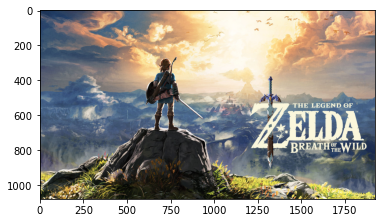

In [3]:
image = cv2.imread('BotW.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## Functions

In [4]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

def color_analysis(image, img, fig_name = "color_analysis_report"):
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
  
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    fig.suptitle('Color analyzer')
    ax1.imshow(image)
    ax1.axis('off')
    ax2.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig(fig_name+".png")
    print(hex_colors)

## Working example

['#908983', '#4e5e72', '#d8b486', '#23231e', '#f8eed3']


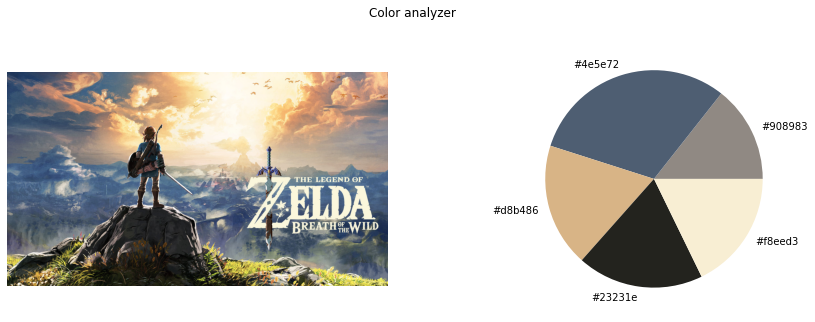

In [5]:
modified_image = prep_image(image)
color_analysis(image, modified_image, 'BOtW')

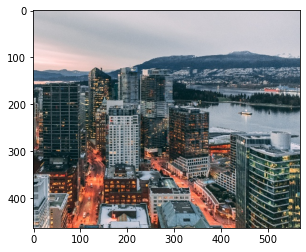

In [6]:
image = cv2.imread('vancouver.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

['#4b565b', '#848f95', '#c5c2c8', '#c37056', '#212b2b']


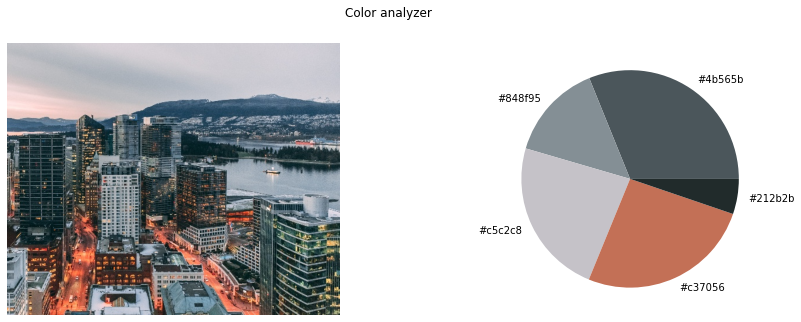

In [7]:
modified_image = prep_image(image)
color_analysis(image, modified_image, "Vancouver-Analyzer")

# Create single function taking as argument path to figure!

In [3]:
def full_analysis(path_to_figure, name = "color_analysis_report"):
    
    image = cv2.imread(path_to_figure)
    print(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    modified_image = prep_image(image)
    color_analysis(image, modified_image, name)

In [4]:
full_analysis("BotW.jpg", name = 'testing')

[[[ 85  53  30]
  [ 81  49  26]
  [ 83  49  26]
  ...
  [118 137 172]
  [127 143 185]
  [122 139 188]]

 [[ 89  57  34]
  [ 86  54  31]
  [ 84  52  29]
  ...
  [118 136 173]
  [131 147 190]
  [129 146 197]]

 [[ 92  60  37]
  [ 90  58  35]
  [ 87  55  32]
  ...
  [118 137 174]
  [136 152 198]
  [135 153 206]]

 ...

 [[ 33  66  52]
  [ 23  56  42]
  [ 31  61  50]
  ...
  [101 169 174]
  [ 18  59  61]
  [  0  13  11]]

 [[ 24  49  35]
  [ 11  38  28]
  [ 24  57  53]
  ...
  [ 55  91 101]
  [ 73  81  88]
  [ 32  20  18]]

 [[ 41  58  47]
  [ 20  43  39]
  [ 19  52  61]
  ...
  [ 13  36  52]
  [ 23  35  41]
  [ 50  54  48]]]


NameError: name 'prep_image' is not defined

['#838e95', '#212b2b', '#c5c2c7', '#c27056', '#4b555b']


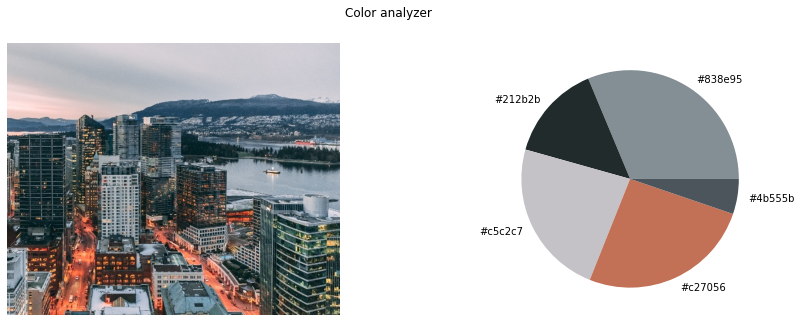

In [10]:
full_analysis("vancouver.jpg", name = 'vancouver-testing')